In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils, datasets
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
np.random.seed(0)
torch.manual_seed(0)

In [12]:
import os
root_dir="/content/drive/MyDrive/archive-2"

In [13]:
image_transforms = {
    "train": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ]),
    "test": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()])
}


In [14]:
image_transforms

{'train': Compose(
     Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
     ToTensor()
 ),
 'test': Compose(
     Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
     ToTensor()
 )}

In [19]:
hotdog_dataset = datasets.ImageFolder(root = root_dir + "/train",
                                      transform = image_transforms["train"]
                                     )
hotdog_dataset


Dataset ImageFolder
    Number of datapoints: 498
    Root location: /content/drive/MyDrive/archive-2/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [21]:
hotdog_dataset.class_to_idx

{'hot_dog': 0, 'not_hot_dog': 1}

In [22]:
idx_2_class={v:k for k,v in hotdog_dataset.class_to_idx.items()}

In [23]:
idx_2_class

{0: 'hot_dog', 1: 'not_hot_dog'}

Text(0.5, 1.0, 'Entire Dataset (before train/val/test split)')

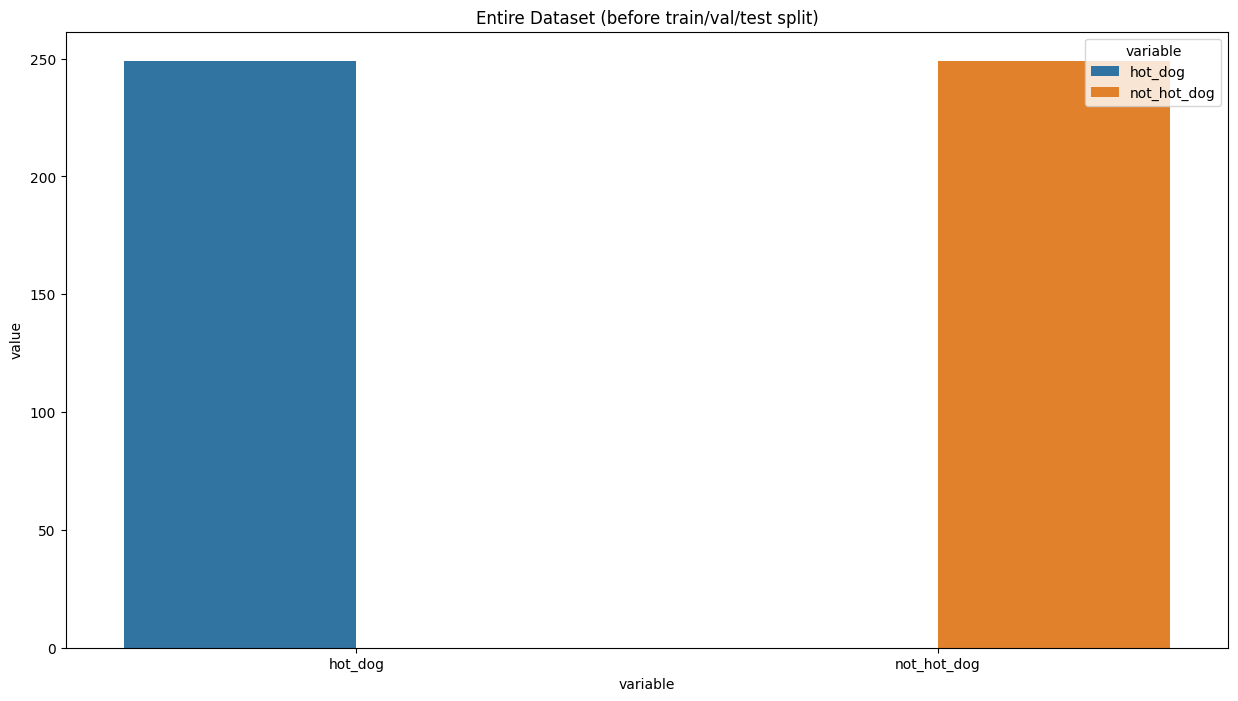

In [25]:
def get_class_distribution(dataset_obj):
    count_dict = {k:0 for k,v in dataset_obj.class_to_idx.items()}
    for _, label_id in dataset_obj:
        label = idx_2_class[label_id]
        count_dict[label] += 1
    return count_dict
def plot_from_dict(dict_obj, plot_title, **kwargs):
    return sns.barplot(data = pd.DataFrame.from_dict([dict_obj]).melt(), x = "variable", y="value", hue="variable", **kwargs).set_title(plot_title)
plt.figure(figsize=(15,8))
plot_from_dict(get_class_distribution(hotdog_dataset), plot_title="Entire Dataset (before train/val/test split)")


In [26]:
hotdog_dataset_size=len(hotdog_dataset)

In [30]:
hotdog_dataset_indices=list(range(hotdog_dataset_size))
hotdog_dataset_indices

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [31]:
np.random.shuffle(hotdog_dataset_indices)

In [32]:
hotdog_dataset_indices

[90,
 254,
 283,
 443,
 336,
 15,
 316,
 487,
 159,
 153,
 241,
 250,
 426,
 289,
 171,
 327,
 466,
 353,
 154,
 37,
 205,
 364,
 240,
 108,
 45,
 436,
 21,
 365,
 96,
 233,
 386,
 118,
 124,
 191,
 372,
 357,
 311,
 447,
 351,
 238,
 322,
 46,
 401,
 221,
 76,
 1,
 213,
 467,
 416,
 102,
 361,
 170,
 390,
 144,
 132,
 12,
 326,
 173,
 224,
 340,
 78,
 276,
 385,
 451,
 301,
 196,
 10,
 402,
 271,
 75,
 142,
 65,
 459,
 331,
 175,
 360,
 264,
 100,
 489,
 295,
 300,
 235,
 427,
 219,
 328,
 325,
 419,
 157,
 346,
 54,
 220,
 400,
 377,
 200,
 179,
 391,
 56,
 438,
 60,
 208,
 107,
 397,
 71,
 482,
 6,
 410,
 113,
 236,
 299,
 155,
 272,
 7,
 137,
 8,
 429,
 430,
 366,
 284,
 210,
 188,
 428,
 49,
 134,
 363,
 408,
 239,
 59,
 493,
 461,
 409,
 483,
 229,
 297,
 55,
 293,
 488,
 456,
 455,
 421,
 186,
 194,
 52,
 74,
 26,
 486,
 4,
 318,
 329,
 245,
 5,
 141,
 381,
 135,
 491,
 122,
 22,
 68,
 20,
 367,
 14,
 278,
 225,
 64,
 379,
 231,
 81,
 354,
 302,
 497,
 469,
 453,
 160,
 476,
 36

In [33]:
val_split_index = int(np.floor(0.2 * hotdog_dataset_size))

In [34]:
val_split_index

99

In [35]:
train_idx, val_idx = hotdog_dataset_indices[val_split_index:], hotdog_dataset_indices[:val_split_index]

In [36]:
train_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(val_idx)

In [37]:
train_sampler

In [39]:
hotdog_dataset_test = datasets.ImageFolder(root = root_dir + "/test",
                                            transform = image_transforms["test"]
                                           )
hotdog_dataset_test

Dataset ImageFolder
    Number of datapoints: 500
    Root location: /content/drive/MyDrive/archive-2/test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [47]:
train_loader = DataLoader(dataset=hotdog_dataset, shuffle=False, batch_size=8, sampler=train_sampler)
val_loader = DataLoader(dataset=hotdog_dataset, shuffle=False, batch_size=1, sampler=val_sampler)

test_loader = DataLoader(dataset=hotdog_dataset_test, shuffle=False, batch_size=1)
train_loader

In [48]:
single_batch = next(iter(train_loader))
single_batch

[tensor([[[[0.1137, 0.0941, 0.0824,  ..., 0.3333, 0.3451, 0.3647],
           [0.1020, 0.0863, 0.0824,  ..., 0.3765, 0.3843, 0.3961],
           [0.0941, 0.0902, 0.0902,  ..., 0.4157, 0.4196, 0.4196],
           ...,
           [0.1294, 0.1255, 0.1216,  ..., 0.1137, 0.1176, 0.1137],
           [0.1255, 0.1216, 0.1216,  ..., 0.1176, 0.1137, 0.1059],
           [0.0980, 0.1294, 0.1294,  ..., 0.1137, 0.1098, 0.1059]],
 
          [[0.0824, 0.0627, 0.0510,  ..., 0.2392, 0.2549, 0.2745],
           [0.0706, 0.0549, 0.0510,  ..., 0.2706, 0.2784, 0.2941],
           [0.0627, 0.0588, 0.0588,  ..., 0.3020, 0.3059, 0.3059],
           ...,
           [0.1059, 0.1020, 0.0980,  ..., 0.0784, 0.0902, 0.0902],
           [0.1020, 0.0980, 0.0980,  ..., 0.0784, 0.0863, 0.0784],
           [0.0745, 0.1059, 0.1059,  ..., 0.0745, 0.0745, 0.0784]],
 
          [[0.0745, 0.0549, 0.0431,  ..., 0.1725, 0.1804, 0.1922],
           [0.0627, 0.0471, 0.0431,  ..., 0.1922, 0.2000, 0.2039],
           [0.0549, 0.05

In [45]:
single_batch = next(iter(test_loader))
single_batch

[tensor([[[[0.3137, 0.3882, 0.4510,  ..., 0.1255, 0.1255, 0.1216],
           [0.2784, 0.3412, 0.4157,  ..., 0.1333, 0.1294, 0.1294],
           [0.2627, 0.3176, 0.3765,  ..., 0.1451, 0.1373, 0.1333],
           ...,
           [0.1255, 0.1176, 0.1333,  ..., 0.9686, 0.9529, 0.9490],
           [0.1608, 0.1569, 0.1647,  ..., 0.9373, 0.9412, 0.9765],
           [0.1647, 0.1804, 0.1843,  ..., 0.7059, 0.8510, 0.8863]],
 
          [[0.3176, 0.4000, 0.4902,  ..., 0.0392, 0.0392, 0.0353],
           [0.2824, 0.3529, 0.4431,  ..., 0.0471, 0.0431, 0.0431],
           [0.2627, 0.3216, 0.4000,  ..., 0.0588, 0.0471, 0.0471],
           ...,
           [0.0353, 0.0235, 0.0314,  ..., 0.8000, 0.7176, 0.6863],
           [0.0745, 0.0627, 0.0667,  ..., 0.7608, 0.7137, 0.7216],
           [0.0784, 0.0863, 0.0824,  ..., 0.5176, 0.6235, 0.6471]],
 
          [[0.6157, 0.7059, 0.8000,  ..., 0.0863, 0.0863, 0.0824],
           [0.5529, 0.6392, 0.7490,  ..., 0.0980, 0.0941, 0.0902],
           [0.4902, 0.58

In [49]:
print("Output label tensors: ", single_batch[1])
print("\nOutput label tensor shape: ", single_batch[1].shape)

Output label tensors:  tensor([0, 1, 0, 1, 1, 0, 0, 0])

Output label tensor shape:  torch.Size([8])


In [62]:
idx1=single_batch[0][1]
idx1.shape

torch.Size([3, 224, 224])

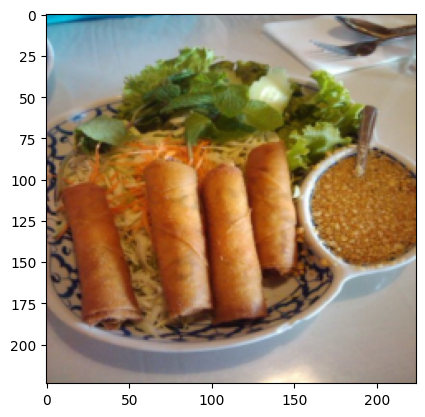

In [63]:
idx1_image=idx1.permute(1,2,0)
plt.imshow(idx1_image)

In [75]:
class HotDogClassifier(nn.Module):
    def __init__(self):
      super(HotDogClassifier, self).__init__()
      self.block1=self.conv_block(c_in=3,c_out=256,dropout=0.1,kernel_size=5,stride=1,padding=2)
      self.block2=self.conv_block(c_in=256,c_out=128,dropout=0.1,kernel_size=3,stride=1,padding=1)
      self.block3=self.conv_block(c_in=128, c_out=64, dropout=0.1, kernel_size=3, stride=1, padding=1)
      self.block4=nn.Conv2d(in_channels=64, out_channels=2, kernel_size=56, stride=1, padding=0)
      self.maxpool=nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
          x = self.block1(x)
          x = self.maxpool(x)
          x = self.block2(x)
          x = self.block3(x)
          x = self.maxpool(x)
          x = self.block4(x)
          return x

    def conv_block(self, c_in, c_out, dropout,  **kwargs):
        seq_block = nn.Sequential(
            nn.Conv2d(in_channels=c_in, out_channels=c_out, **kwargs),
            nn.BatchNorm2d(num_features=c_out),
            nn.ReLU(),
            nn.Dropout2d(p=dropout)
        )
        return seq_block


In [76]:
model = HotDogClassifier()
model.to("cuda")
print(model)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.008)

HotDogClassifier(
  (block1): Sequential(
    (0): Conv2d(3, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout2d(p=0.1, inplace=False)
  )
  (block2): Sequential(
    (0): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout2d(p=0.1, inplace=False)
  )
  (block3): Sequential(
    (0): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout2d(p=0.1, inplace=False)
  )
  (block4): Conv2d(64, 2, kernel_size=(56, 56), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [77]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_tag, dim = 1)
    correct_results_sum = (y_pred_tags == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = f"{torch.round(acc * 100)}%"
    return acc


In [78]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}


In [83]:
print("Begin training.")
for e in tqdm(range(1, 21)):
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to("cuda"), y_train_batch.to("cuda")
        optimizer.zero_grad()
        y_train_pred = model(X_train_batch).squeeze()
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = binary_acc(y_train_pred, y_train_batch)
        train_loss.backward()
        optimizer.step()
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
    # VALIDATION
    with torch.no_grad():
        model.eval()
        val_epoch_loss = 0
        val_epoch_acc = 0
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to("cuda"), y_val_batch.to("cuda")
            y_val_pred = model(X_val_batch).squeeze()
            y_val_pred = torch.unsqueeze(y_val_pred, 0)
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = binary_acc(y_val_pred, y_val_batch)
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
    print(f'Epoch {e+0:02}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')


Begin training.


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 01: | Train Loss: 0.00000 | Val Loss: 0.00000 | Train Acc: 0.000| Val Acc: 0.000
Epoch 02: | Train Loss: 0.00000 | Val Loss: 0.00000 | Train Acc: 0.000| Val Acc: 0.000
Epoch 03: | Train Loss: 0.00000 | Val Loss: 0.00000 | Train Acc: 0.000| Val Acc: 0.000
Epoch 04: | Train Loss: 0.00000 | Val Loss: 0.00000 | Train Acc: 0.000| Val Acc: 0.000
Epoch 05: | Train Loss: 0.00000 | Val Loss: 0.00000 | Train Acc: 0.000| Val Acc: 0.000
Epoch 06: | Train Loss: 0.00000 | Val Loss: 0.00000 | Train Acc: 0.000| Val Acc: 0.000
Epoch 07: | Train Loss: 0.00000 | Val Loss: 0.00000 | Train Acc: 0.000| Val Acc: 0.000
Epoch 08: | Train Loss: 0.00000 | Val Loss: 0.00000 | Train Acc: 0.000| Val Acc: 0.000
Epoch 09: | Train Loss: 0.00000 | Val Loss: 0.00000 | Train Acc: 0.000| Val Acc: 0.000
Epoch 10: | Train Loss: 0.00000 | Val Loss: 0.00000 | Train Acc: 0.000| Val Acc: 0.000
Epoch 11: | Train Loss: 0.00000 | Val Loss: 0.00000 | Train Acc: 0.000| Val Acc: 0.000
Epoch 12: | Train Loss: 0.00000 | Val Loss:

In [ ]:
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,10))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')


In [ ]:
y_pred_list = []
y_true_list = []
with torch.no_grad():
    for x_batch, y_batch in tqdm(test_loader):
        x_batch, y_batch = x_batch.to("cuda"), y_batch.to("cuda")
        y_test_pred = model(x_batch)
        _, y_pred_tag = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tag.cpu().numpy())
        y_true_list.append(y_batch.cpu().numpy())

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
y_pred_list = [i[0][0][0] for i in y_pred_list]
y_true_list = [i[0] for i in y_true_list]

In [ ]:
print(classification_report(y_true_list, y_pred_list))

In [ ]:
print(confusion_matrix(y_true_list, y_pred_list))